In [1]:
#LECTURA DE TABLAS DB

In [2]:
#!pip install duckdb

In [40]:
import pandas as pd
import requests
import sqlite3
import duckdb
import matplotlib.pyplot as plt


In [4]:
!ls

:Users:herminiapadialromera:ironhackb:ironhack_challenges:Challenge EDA:diamonds_train.db
EDA CHALLENGE .ipynb
diamonds_train.db
diamonds_train.db.wal


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#CONEXIÓN CON DUCKDB
conexion = sqlite3.connect('/Users/herminiapadialromera/ironhackb/diamonds_train.db')
conexion

## Lectura de datos


In [7]:
#TABLA: CITY
df_diamonds_city =pd.read_sql_query("SELECT * FROM diamonds_city", conexion)

In [8]:
df_diamonds_city

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [9]:
#TABLA: COLOR
df_diamonds_color = pd.read_sql_query("SELECT * FROM diamonds_color", conexion)
df_diamonds_color.head(2)


,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D


In [10]:
#TABLA:CUT
df_diamonds_cut = pd.read_sql_query("SELECT * FROM diamonds_cut", conexion)
df_diamonds_cut.head(2)

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal


In [11]:
#TABLA:DIMENSIONS
df_diamonds_dimensions = pd.read_sql_query("SELECT * FROM diamonds_dimensions", conexion)
df_diamonds_dimensions.head(2)

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75


In [12]:
#TABLA:PROPIEDADES
df_diamonds_properties = pd.read_sql_query("SELECT * FROM diamonds_properties", conexion)
df_diamonds_properties.head(2)

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...


In [13]:
#TABLA:TRANSACCIÓN
df_diamonds_transactional = pd.read_sql_query("SELECT * FROM diamonds_transactional", conexion)
df_diamonds_transactional.head(2)

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32


In [14]:
#TABLA:
df_diamonds_clarity = pd.read_sql_query("SELECT * FROM diamonds_clarity", conexion)
df_diamonds_clarity.head(2)

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2


In [15]:
#TABLA: ESQUEMA
df_sqlite_schema = pd.read_sql_query("SELECT * FROM sqlite_schema ", conexion)
df_sqlite_schema.head(2)

,type,name,tbl_name,rootpage,sql
0,table,diamonds_dimensions,diamonds_dimensions,2,CREATE TABLE diamonds_dimensions (\n\tindex_id...
1,index,sqlite_autoindex_diamonds_dimensions_1,diamonds_dimensions,3,None


## Merge de los DF

In [16]:
df1 = pd.merge(pd.merge(df_diamonds_dimensions, df_diamonds_properties, on='index_id'), df_diamonds_transactional, on='index_id')
df1

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_id    40455 non-null  object 
 1   depth       40455 non-null  float64
 2   table       40455 non-null  float64
 3   x           40455 non-null  float64
 4   y           40455 non-null  float64
 5   z           40455 non-null  float64
 6   cut_id      40455 non-null  object 
 7   color_id    40455 non-null  object 
 8   clarity_id  40455 non-null  object 
 9   price       40455 non-null  int64  
 10  city_id     40455 non-null  object 
 11  carat       40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.0+ MB


In [18]:
df2 = pd.merge(df1,df_diamonds_city, on='city_id')
df2.head(2)

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai
1,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index_id    40455 non-null  object 
 1   depth       40455 non-null  float64
 2   table       40455 non-null  float64
 3   x           40455 non-null  float64
 4   y           40455 non-null  float64
 5   z           40455 non-null  float64
 6   cut_id      40455 non-null  object 
 7   color_id    40455 non-null  object 
 8   clarity_id  40455 non-null  object 
 9   price       40455 non-null  int64  
 10  city_id     40455 non-null  object 
 11  carat       40455 non-null  float64
 12  city        40455 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 4.3+ MB


In [20]:
df3 = pd.merge(df2,df_diamonds_color, on='color_id')
df3.head(2)

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,city,color
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,J
1,556d7dc3a115356350f1f9910b1af1ab0e312d4b3e4fc7...,62.3,55.0,6.74,6.77,4.21,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,4883,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.17,Dubai,J


In [21]:
df4 = pd.merge(df3,df_diamonds_cut, on='cut_id')
df4.head(2)

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,city,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,J,Premium
1,1a5de96b83081a02b1e821bae8fdf6df379110e930d2cb...,62.8,59.0,6.19,6.14,3.87,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,2905,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.91,Dubai,J,Premium


In [22]:
df5 = pd.merge(df4,df_diamonds_clarity, on='clarity_id')
df5.head(2)

,index_id,depth,table,x,y,z,cut_id,color_id,clarity_id,price,city_id,carat,city,color,cut,clarity
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,J,Premium,VS2
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai,J,Premium,VS2


In [23]:
df6 = df5.drop(['cut_id', 'color_id', 'city_id', 'clarity_id'], axis=1)
df6.head()

,index_id,depth,table,x,y,z,price,carat,city,color,cut,clarity
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Dubai,J,Premium,VS2
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Dubai,J,Premium,VS2
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Dubai,J,Premium,VS2
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Dubai,J,Premium,VS2
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Dubai,J,Premium,VS2


In [28]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   depth     40455 non-null  float64
 2   table     40455 non-null  float64
 3   x         40455 non-null  float64
 4   y         40455 non-null  float64
 5   z         40455 non-null  float64
 6   price     40455 non-null  int64  
 7   carat     40455 non-null  float64
 8   city      40455 non-null  object 
 9   color     40455 non-null  object 
 10  cut       40455 non-null  object 
 11  clarity   40455 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 4.0+ MB


In [29]:
df6.describe()

,depth,table,x,y,z,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469,0.797706
std,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147,0.475544
min,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.200000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000,0.700000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000,1.040000
max,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000,4.500000


In [30]:
df_group = df6.groupby(by='city')
df_group.head(10)

,index_id,depth,table,x,y,z,price,carat,city,color,cut,clarity
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Dubai,J,Premium,VS2
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Dubai,J,Premium,VS2
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Dubai,J,Premium,VS2
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Dubai,J,Premium,VS2
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Dubai,J,Premium,VS2
...,...,...,...,...,...,...,...,...,...,...,...,...
304,e3e69eaf6c365e40a7a9fbb927273b3a7d8c2f5893e448...,60.6,60.0,4.34,4.30,2.62,675,0.30,Tel Aviv,G,Premium,VS2
336,a0eaec5a55dc2f5b2ba523018adc485ff620b9d83509b9...,61.8,58.0,4.35,4.39,2.70,435,0.31,Amsterdam,G,Premium,VS2
337,2163909115c0f6f1e638bd2c2279387cbe37cc327150a7...,61.1,58.0,7.73,7.69,4.71,15946,1.72,Amsterdam,G,Premium,VS2
668,07bed92aab16ecdd9c886a79e44f0c0b02d70c746c593e...,61.0,57.0,5.68,5.63,3.45,2050,0.67,New York City,G,Premium,VS2


In [31]:
df_group_city = df6.groupby(by='city').sum().sort_values('price', ascending=False)


/var/folders/8h/kk_7h3_s4y11kgj5jm9784d00000gn/T/ipykernel_53029/2245560054.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_city = df6.groupby(by='city').sum().sort_values('price', ascending=False)


In [32]:
df_group_city.head(20)

,depth,table,x,y,z,price,carat
city,,,,,,,
Surat,313220.3,291555.4,29119.84,29130.03,17972.05,20123695,4071.91
Kimberly,307369.5,285991.2,28544.96,28560.33,17626.39,19806237,3988.31
Antwerp,311553.7,290150.6,28881.58,28892.47,17832.83,19391713,4001.48
Dubai,158179.7,147040.9,14737.59,14743.34,9101.14,10210177,2061.83
New York City,159674.1,148520.4,14854.86,14856.89,9164.60,10157646,2077.38
Las Vegas,159776.2,148561.2,14787.76,14789.57,9133.65,10135050,2054.14
Madrid,156852.8,145891.1,14571.54,14575.70,8990.47,10103241,2034.46
Luxembourg,160950.3,149718.2,14878.90,14887.32,9190.18,10041655,2062.26
Zurich,154128.2,143286.0,14355.67,14366.04,8864.84,10039535,2009.72


## Visualizaciones

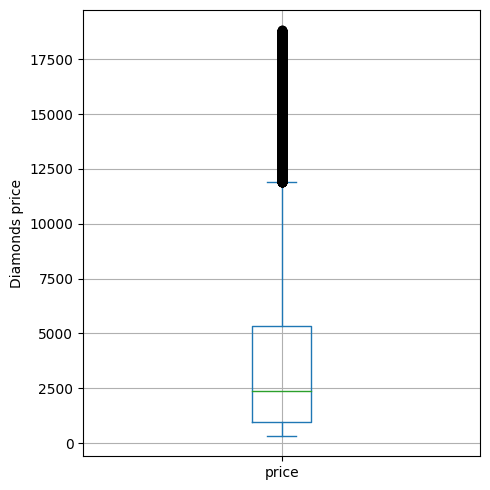

In [42]:
data = df6['price']
ax = data.plot.box(figsize=(5, 5))
ax.set_ylabel('Diamonds price')
plt.tight_layout()
plt.grid()
plt.show()

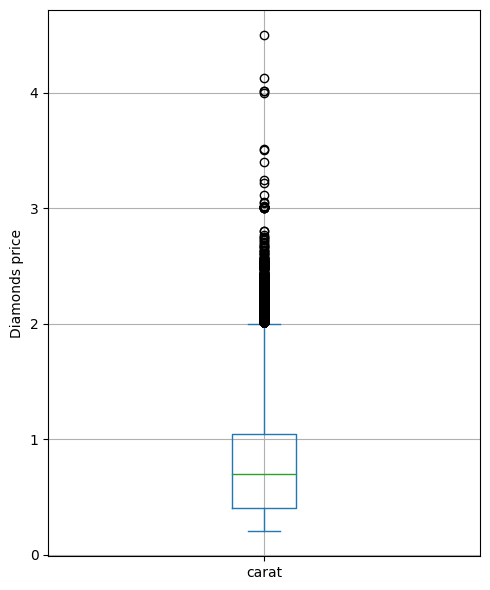

In [46]:
data = df6['carat']
ax = data.plot.box(figsize=(5, 6))
ax.set_ylabel('Diamonds price')
plt.tight_layout()
plt.grid()
plt.show()

In [35]:
proportion_city = round(df6['city'].value_counts().sort_values() * 100 / 40455)
proportion_city

London            6.0
Amsterdam         6.0
Zurich            6.0
Tel Aviv          6.0
Paris             6.0
Madrid            6.0
Dubai             6.0
Las Vegas         6.0
New York City     6.0
Luxembourg        6.0
Kimberly         12.0
Antwerp          12.0
Surat            13.0
Name: city, dtype: float64

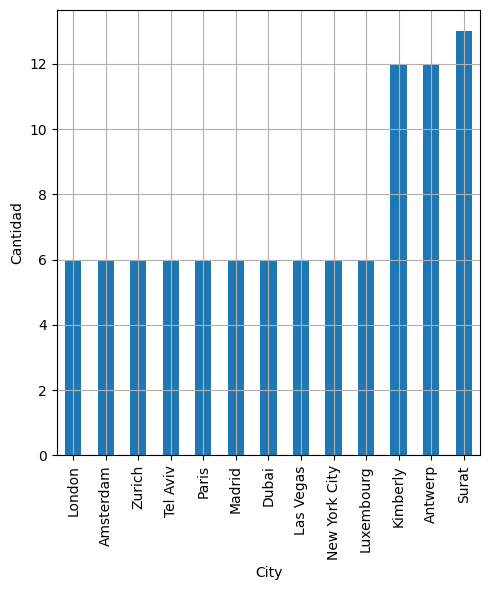

In [53]:
data = proportion_city
ax = data.plot(kind='bar', figsize=(5, 6))
ax.set_ylabel('Cantidad')
ax.set_xlabel('City')
plt.tight_layout()
plt.grid()
plt.show()

In [33]:
#df_group_color = df4.groupby(by='color').sort('carat', ascending=False)
df_group_color = df6.groupby(by='color').apply(lambda x: x.sort_values('carat', ascending=False))
df_group_color

index_id  depth  table  \
color                                                                          
D     40252  83e86276134048f50522b4944d21f8a52004f7b138b58c...   66.8   52.0   
      40093  1158e7e12c5e7362318e5e3c2e1f2f1ab49578ab1d1691...   60.9   57.0   
      20134  5b7c4e75c9485e2e988dce7c57bd9e9915a74217914e7d...   58.9   58.0   
      20368  cf46eed0371a59efdb771a028fc3c507938b2fa2502d76...   60.4   59.0   
      22263  fd7d7737659a900fffc741184a97f267caf5e60b58a07d...   61.8   57.0   
...                                                        ...    ...    ...   
J     31529  1cfafff6d51a03662b85b93dc3417f51687034ba9a4668...   63.5   58.0   
      36911  66d53305d0db77256eba9445bdbdadaa8d64a2150ed387...   58.4   60.0   
      35988  1f29cebdfed9a64c3afe0a343e0889d0988263a2fa4e27...   60.8   57.0   
      34002  2b96234df5cbfc882950295a3c7e3135d451851227fe9d...   62.8   57.0   
      27474  d649cb577f4dea69bde7fb9ea29cd849a46273dd42cdf3...   62.8   56.0   

                x     y     z  price  carat           city color        cut  \
color                                                                         
D     40252  9.42  9.34  6.27  15964   3.40         Madrid     D       Fair   
      40093  9.04  8.98  5.49  13156   2.75  New York City     D      Ideal   
      20134  8.99  8.94  5.28  17924   2.57          Dubai     D    Premium   
      20368  8.54  8.48  5.13  18007   2.25     Luxembourg     D    Premium   
      22263  8.23  8.49  5.17  18693   2.19      Las Vegas     D      Ideal   
...           ...   ...   ...    ...    ...            ...   ...        ...   
J     31529  4.24  4.27  2.70    394   0.30        Antwerp     J       Good   
      36911  4.27  4.33  2.51    375   0.28          Surat     J       Good   
      35988  4.16  4.20  2.54    443   0.27         Madrid     J  Very Good   
      34002  3.96  3.94  2.48    432   0.24     Luxembourg     J      Ideal   
      27474  3.93  3.90  2.46    340   0.23          Surat     J      Ideal   

            clarity  
color                
D     40252      I1  
      40093      I1  
      20134     SI2  
      20368     SI2  
      22263     SI2  
...             ...  
J     31529     VS1  
      36911    VVS2  
      35988    VVS2  
      34002    VVS2  
      27474     VS1  

[40455 rows x 12 columns]

In [36]:
proportion_color = round(df6['color'].value_counts().sort_values() * 100 / 40455)
proportion_color

J     5.0
I    10.0
D    12.0
H    16.0
F    18.0
E    18.0
G    21.0
Name: color, dtype: float64

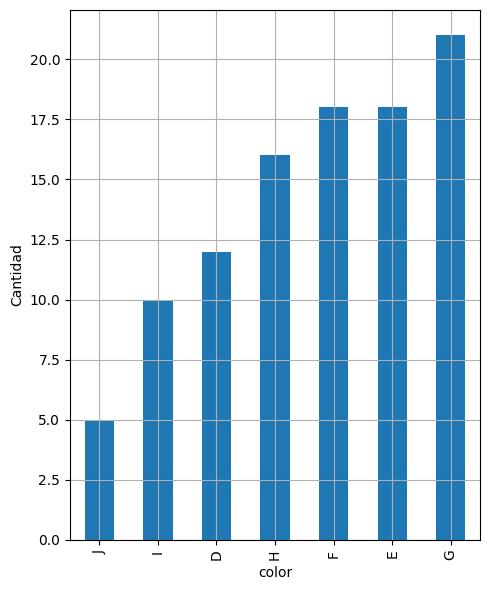

In [49]:
data = proportion_color
ax = data.plot(kind='bar', figsize=(5, 6))
ax.set_ylabel('Cantidad')
ax.set_xlabel('color')
plt.tight_layout()
plt.grid()
plt.show()

In [51]:
proportion_clarity = round(df6['clarity'].value_counts().sort_values() * 100 / 40455)
proportion_clarity

I1       1.0
IF       3.0
VVS1     7.0
VVS2     9.0
VS1     15.0
SI2     17.0
VS2     23.0
SI1     24.0
Name: clarity, dtype: float64

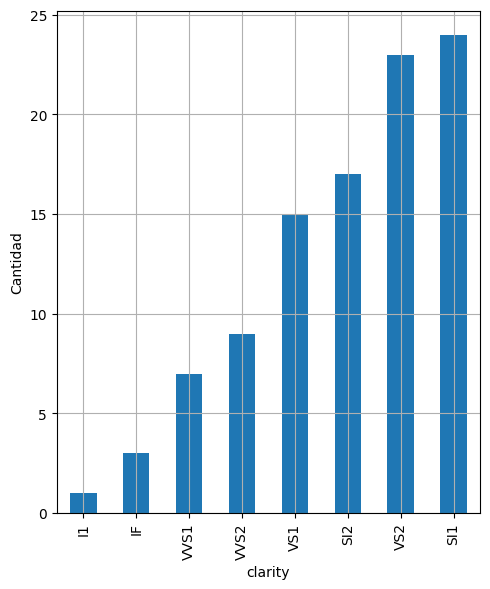

In [52]:
data = proportion_clarity
ax = data.plot(kind='bar', figsize=(5, 6))
ax.set_ylabel('Cantidad')
ax.set_xlabel('clarity')
plt.tight_layout()
plt.grid()
plt.show()